In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataframe

In [4]:
df = pd.read_csv('history_data.csv')

In [5]:
df.head()

,Background of Architect,Structure Type,Required Construction Materials,Characterization of Blueprints,Is Completed Structure Impossible?,Cost of Structure
0,Apprenticed under T. Geisel,Uncategorizable Thing,Steel and Glass,Hastily Sketched,No,27466
1,Apprenticed under P. Stamatin,Mechanism,Wood and Nightmares,Hastily Sketched,No,937
2,Apprenticed under T. Geisel,Library,Steel and Dreams,Deceptively Ordinary,No,1003120
3,Apprenticed under T. Geisel,Uncategorizable Thing,Wood and Nightmares,Deceptively Ordinary,No,688
4,Apprenticed under R. Penrose,Gateway,Wood and Dreams,Obsessively Detailed,Yes,438244


In [7]:
df.columns.tolist()

['Background of Architect',
 'Structure Type',
 'Required Construction Materials',
 'Characterization of Blueprints',
 'Is Completed Structure Impossible?',
 'Cost of Structure']

# Data Exploration

### Helper Function

In [59]:
def plot_categorical_impossibility(df, category):
    '''
    Method to plot the correlation between one categorical 
    column and the impossibility of the structures
    '''
    grouped = df.groupby([category, 'Is Completed Structure Impossible?']).size().reset_index(name='count')
    pivot = grouped.pivot(index=category, columns='Is Completed Structure Impossible?', values='count')

    # create a stacked bar chart
    ax = pivot.plot(kind='bar', stacked=True)

    # set chart title and axes labels
    ax.set_title(f'Effect of {category} on impossibility')
    ax.set_xlabel(category)
    ax.set_ylabel('Count')

def plot_categorical_cost(df, category):
    # yes_df = df[df['Is Completed Structure Impossible?'] == 'Yes']
    # no_df = df[df['Is Completed Structure Impossible?'] == 'No']

    # plt.scatter(yes_df['Cost of Structure'], [1]*len(yes_df), color='green', label='Impossible')
    # plt.scatter(no_df['Cost of Structure'], [0]*len(no_df), color='red', label='Not Impossible')

    # plt.title(f'Effect of {category} on Impossibility')
    # plt.xlabel(category)
    # plt.ylabel('Impossibility')

    # plt.legend()
    # plt.show()

    categorical_values = df[category].unique()
    color_codes = plt.cm.rainbow([i/len(categorical_values) for i in range(len(categorical_values))])
    color_dict = dict(zip(categorical_values, color_codes))

    for value in categorical_values:
        sub_df = df[df[category] == value]
        plt.scatter(sub_df['Cost of Structure'], [value]*len(sub_df), color=color_dict[value], label=value)

    plt.title(f'Cost of Structure vs. {category}')
    plt.xlabel('Cost of Structure')
    plt.ylabel(f'{category}')
    #plt.legend()

    # show the chart
    plt.show()

## Background of Architect vs Impossibility

In [31]:
print(df['Background of Architect'].unique())
print(df['Is Completed Structure Impossible?'].unique())

['Apprenticed under T. Geisel' 'Apprenticed under P. Stamatin'
 'Apprenticed under R. Penrose' 'Apprenticed under M. Escher'
 'Self-Taught' 'Apprenticed under M. Bosch']
['No' 'Yes']


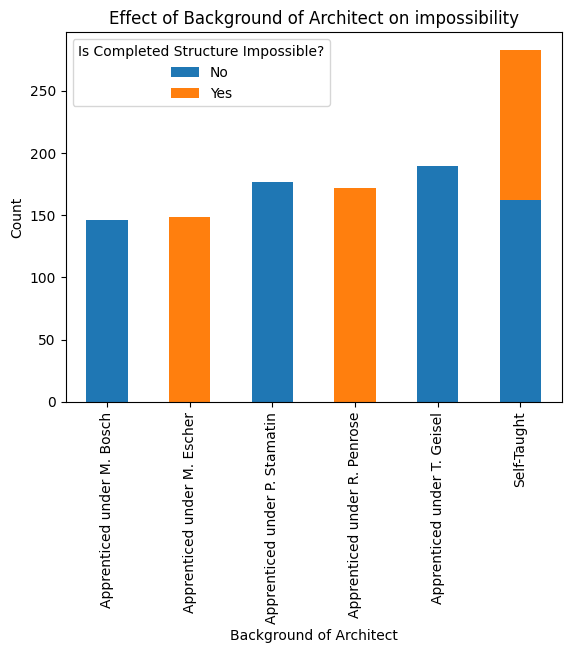

In [32]:
plot_categorical_impossibility(df, 'Background of Architect')

Interestingly, anyone who apprenticed under M. Bosch, P. Stamatin, or T. Geisel has never made an impossible structure. Being self taught leaves the impossibility up in the air. Let us examine these in particular, as otherwise we have a pretty good idea of who can make an impossible structure just by who they apprenticed under.

## Exploring self-taught architects

In [19]:
self_taught_df = df[df['Background of Architect'] == 'Self-Taught']

### Structure Type vs Imposibility for self-taught architects

We see that structure type tends to not have any real correlation with impossibility

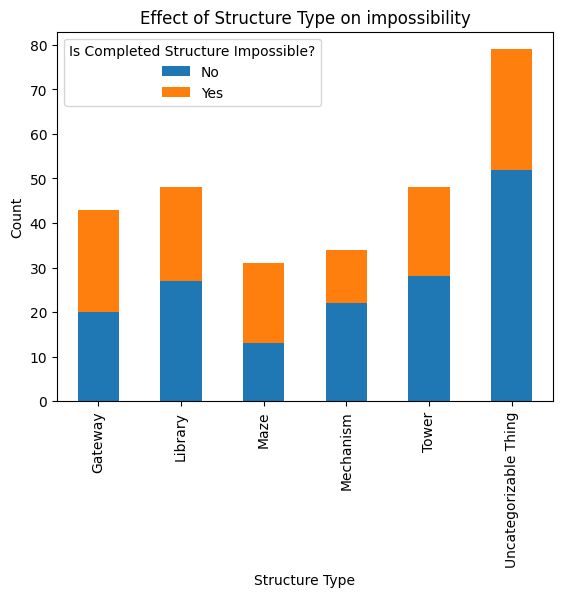

In [44]:
plot_categorical_impossibility(self_taught_df, 'Structure Type')

### Required Construction Materials vs Imposibility for self-taught architects

We see that required construction materials tends to not have any real correlation with impossibility

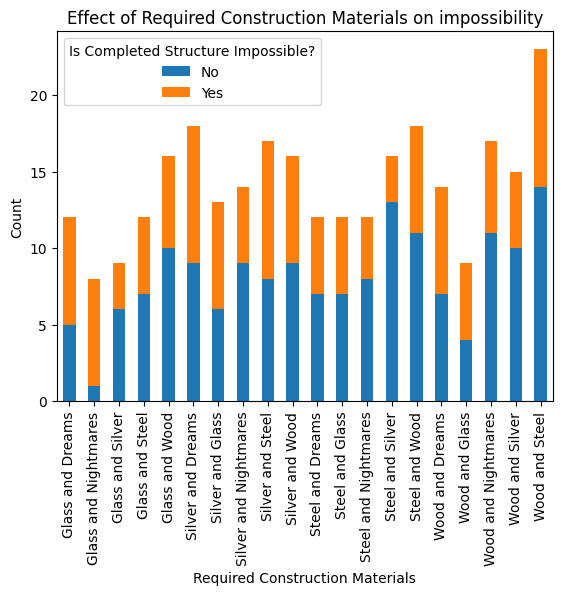

In [42]:
plot_categorical_impossibility(self_taught_df, 'Required Construction Materials')

### Characterization of Blueprints vs Imposibility for self-taught architects

We see that characterization of blueprints tends to not have any real correlation with impossibility

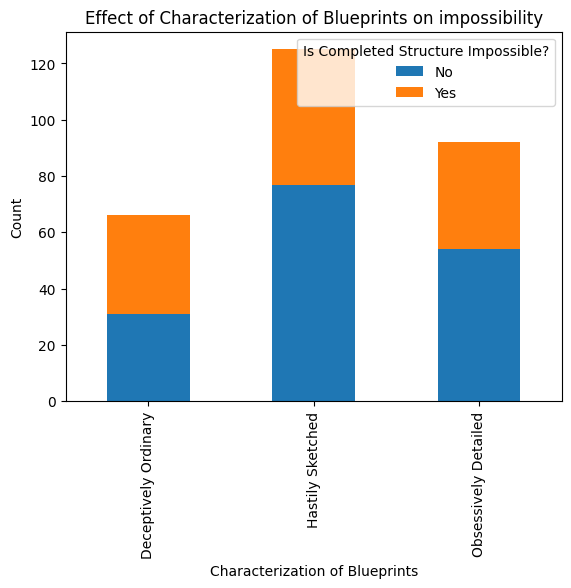

In [40]:
plot_categorical_impossibility(self_taught_df, 'Characterization of Blueprints')

### Cost of Structure vs Imposibility for self-taught architects

We see that the cost of the struture tends to not have a impact on whether it is impossible

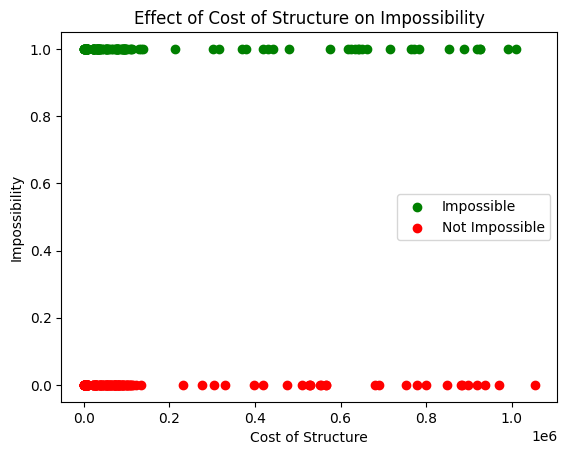

In [53]:
yes_df = self_taught_df[self_taught_df['Is Completed Structure Impossible?'] == 'Yes']
no_df = self_taught_df[self_taught_df['Is Completed Structure Impossible?'] == 'No']

plt.scatter(yes_df['Cost of Structure'], [1]*len(yes_df), color='green', label='Impossible')
plt.scatter(no_df['Cost of Structure'], [0]*len(no_df), color='red', label='Not Impossible')

plt.title('Effect of Cost of Structure on Impossibility')
plt.xlabel('Cost of Structure')
plt.ylabel('Impossibility')

plt.legend()
plt.show()

## Exploring successful architects

In [47]:
succ_df = df[(df['Background of Architect'] == 'Apprenticed under M. Escher') | (df['Background of Architect'] == 'Apprenticed under R. Penrose')]

We see in the following graphs that:

- Of all structure types, "Unrecognizable thing" has been done the most successfully
- Of all materials, there seems to be a spike in popularity of silver & nightmares, steel & nighmares, wood & nightmares, and wood & steel
- Of all blueprints, hastily sketched seem to be more popular

As a conclusion, we might want to err on these popular choices for successful projects as they have been done before more often

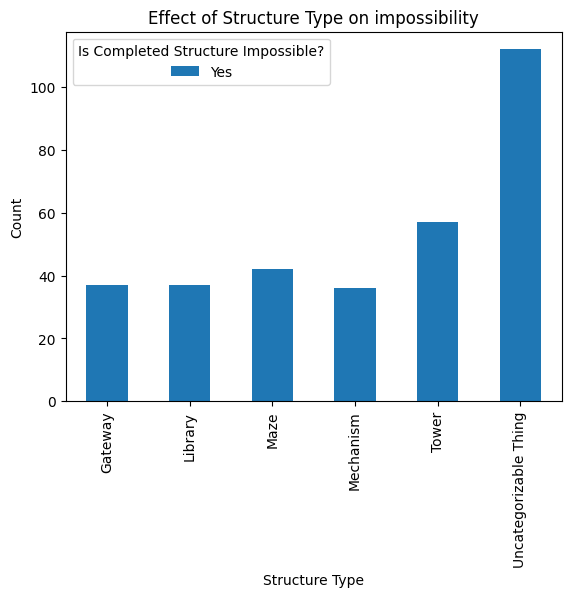

In [49]:
plot_categorical_impossibility(succ_df, 'Structure Type')

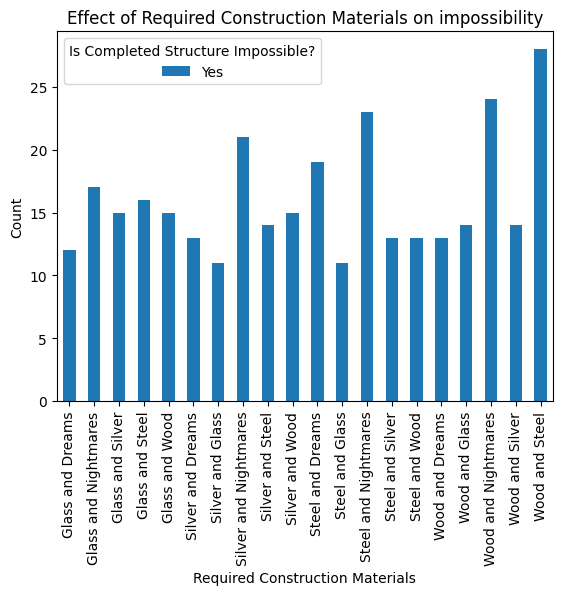

In [50]:
plot_categorical_impossibility(succ_df, 'Required Construction Materials')

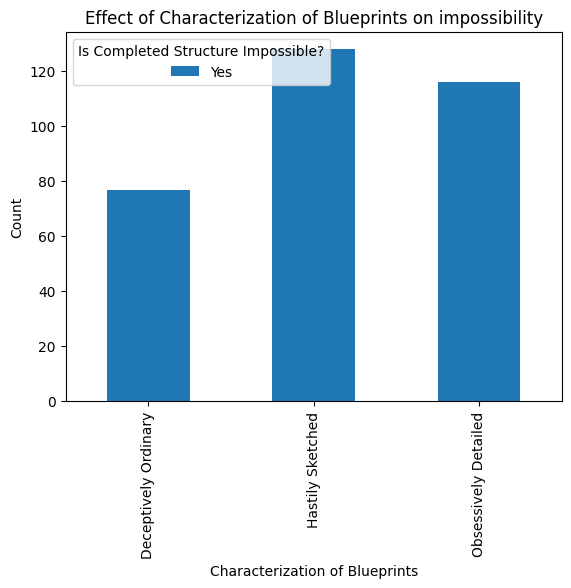

In [51]:
plot_categorical_impossibility(succ_df, 'Characterization of Blueprints')

### Conclusions:

If your goal is to maximize impossibility I find that choosing architects who apprenticed under M. Escher, or R. Penrose seems to work the best, and choosing any other architect who apprenticed under M. Bosch, P. Stamatin, or T. Geisel seems to never work. If the architect was self taught, there seems to be no clear method of finding out if the structure will be impossible.

Now, let's explore lowering cost:

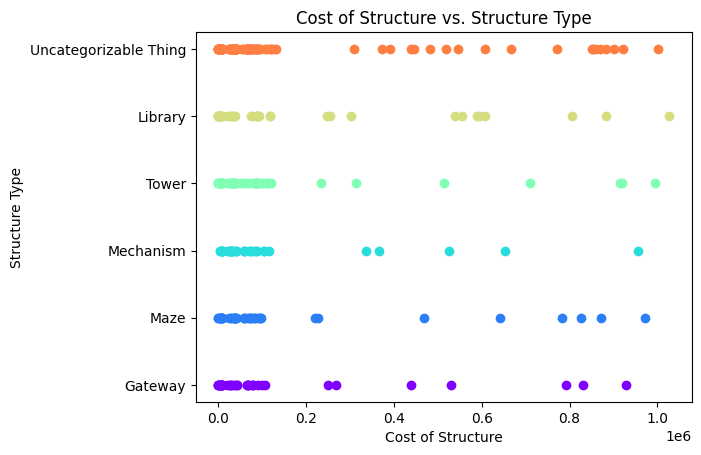

In [60]:
plot_categorical_cost(succ_df, 'Structure Type')

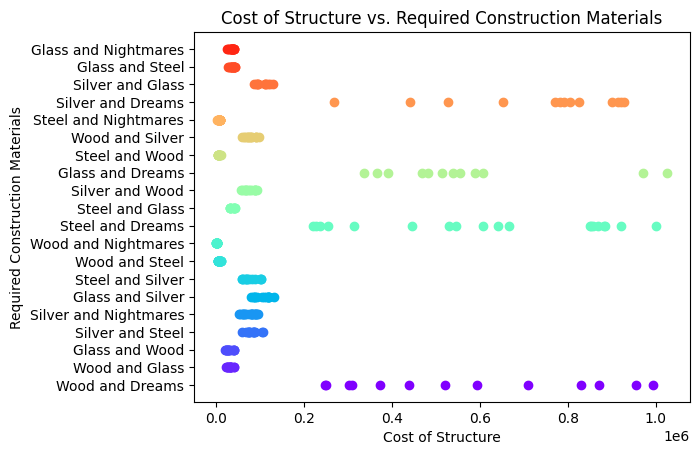

In [61]:
plot_categorical_cost(succ_df, 'Required Construction Materials')

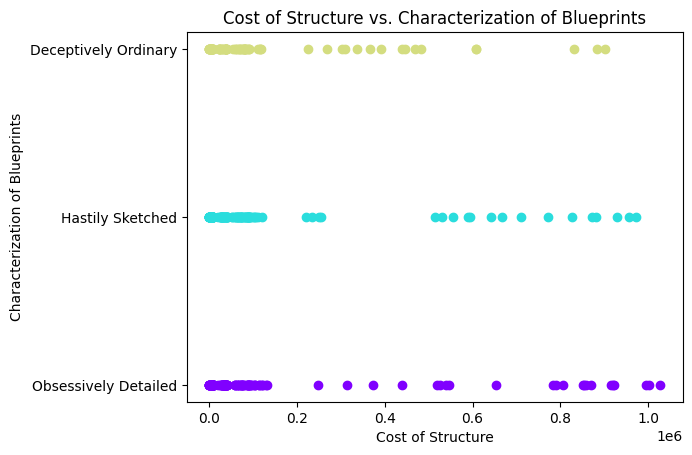

In [62]:
plot_categorical_cost(succ_df, 'Characterization of Blueprints')

Cost of structure tends to depend on required construction material, with materials such as steel & nightmares, wood & nightmares, and wood & steel being some of the cheapest options.